In [40]:
# Import necessary libraries
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
# Visulaization
import pydotplus
from IPython.display import Image

In [41]:
# Read CSV file

CADUSD_df = pd.read_csv(
    Path("/Users/prsm/Desktop/Fintech/Projects/ML_exchange_rate/CAD-USD Daily Exchange Rate.csv"), index_col = 'Date',  infer_datetime_format = True, parse_dates = True
)

CADUSD_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-10-01,1.34970,1.35120,1.34300,1.34510,1.34510,0.0
2003-10-02,1.34490,1.35130,1.33760,1.34020,1.34020,0.0
2003-10-03,1.33970,1.34820,1.33690,1.34310,1.34310,0.0
2003-10-06,1.34650,1.34820,1.33870,1.33900,1.33900,0.0
2003-10-07,1.33950,1.34160,1.32720,1.33120,1.33120,0.0
...,...,...,...,...,...,...
2023-03-07,1.36162,1.37418,1.35999,1.36162,1.36162,0.0
2023-03-08,1.37480,1.37917,1.37440,1.37480,1.37480,0.0
2023-03-09,1.37994,1.38164,1.37529,1.37994,1.37994,0.0


In [42]:
CADUSD_df = CADUSD_df.apply(pd.to_numeric, errors='coerce')
CADUSD_df = CADUSD_df.dropna()

In [43]:
# Split data into features and target variable
X = CADUSD_df[['Open', 'High', 'Low']]
y = CADUSD_df['Close']

In [44]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Create a random forest regression object
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

In [46]:
# Train the random forest regression model on the training data
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [47]:
# Make predictions on the testing data
y_pred = rf_regressor.predict(X_test)

In [48]:
# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [60]:
# determine recommendation based on predicted value
last_price = CADUSD_df.iloc[-1]['Close']
predicted_price = rf_regressor.predict(X.iloc[[-1]][['Open', 'High', 'Low']])[0]
if predicted_price > last_price:
	recommendation = "BUY"
else:
	recommendation = "SELL"

In [62]:
# print recommendation and R-squared
print('Recommendation:', recommendation)
print('R-squared:', r2)

Recommendation: SELL
R-squared: 0.9993095945122954


In [61]:
print('Mean Squared Error:', mse)
print('R-squared Score:', r2)

Mean Squared Error: 1.1759593276669986e-05
R-squared Score: 0.9993095945122954


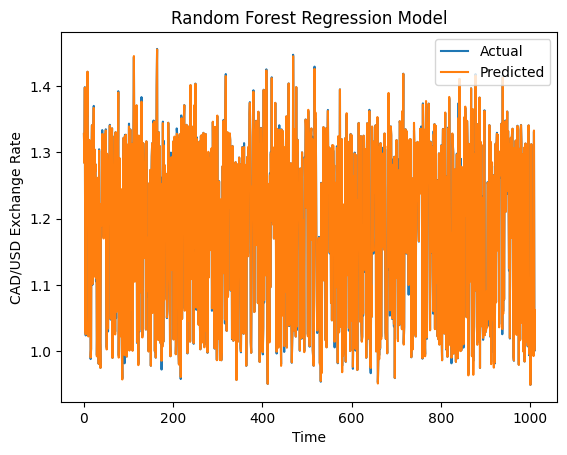

In [50]:
# Plot the actual vs. predicted values for the test data
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time')
plt.ylabel('CAD/USD Exchange Rate')
plt.title('Random Forest Regression Model')
plt.legend()
plt.show()

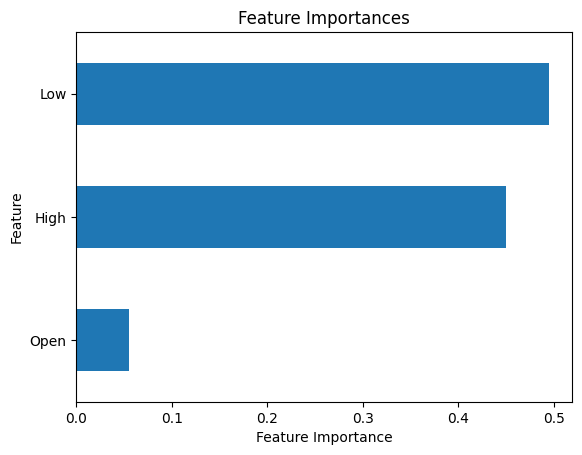

In [51]:
# Plot feature importances
feature_importances = pd.Series(rf_regressor.feature_importances_, index=X.columns)
feature_importances.plot(kind='barh')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

In [53]:
print("___________________________________")

___________________________________
